# Imgo Demo: Advanced Features

Hello! Welcome to **imgo**, a simple library that makes image data processing quick and easy. **Imgo** is primarily geared towards image classification but can be applied to many other types of projects.

This is a demonstration of some of the more advanced features included in the library. For the basic functionality, see the `augtools_demo.ipynb` and `uptools_demo.ipynb` notebooks included in the repo.

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import imageio
import matplotlib.pyplot as plt
%matplotlib inline

The following features make use of both **uptools** and **augtools**, so lets begin by importing both:

In [2]:
from imgo import uptools
from imgo import augtools

And setting up an `Image_Dataset` object, as well as an `Augmenter`:

In [3]:
image_dataset = uptools.Image_Dataset('demo_img_data/imgs_a',"imgs",180)

Processing X_data: 100%|██████████| 15/15 [00:00<00:00, 957.92it/s]

Compiling datasets...
Image_Datset initialized successfully.


In [4]:
augmenter = augtools.Augmenter(rotate_range=(-22,22),
                               shear_range=(-20,20),
                               dropout_pair=(0.1,0.9),
                               x_scale=(0.5,1.2),
                               y_scale=(0.5,1.2),
                               x_shift=(-0.1,0.1),
                               y_shift=(-0.1,0.1),
                               clip_limit=(1,10),
                               pwa_scale=(0.01,0.09),
                               h_flip=0.3,
                               v_flip=0.3,
                               g_sev=2,
                               b_sev=3,
                               e_sev=2,
                               contrast=True,
                               sharpness=True,
                               fill_mode="reflect",
                               randomize_params=True)

## Specifying Transformation Order

The order in which the transformations are applied is important, and can lead to drastically different results. When using the `random_augment` method, the transformations are applied in a random order. However, when using the `simple_augment` method, the default order corresponds to the alphabetical order of the transformation functions' names, like so:

- `[0]` - `aug_brightness`
- `[1]` - `aug_clahe`
- `[2]` - `aug_contrast`
- `[3]` - `aug_dropout`
- `[4]` - `aug_elastic`
- `[5]` - `aug_g_noise`
- `[6]` - `aug_h_flip`
- `[7]` - `aug_pwa`
- `[8]` - `aug_rotate`
- `[9]` - `aug_sharpness`
- `[10]` - `aug_shear`
- `[11]` - `aug_v_flip`
- `[12]` - `aug_x_scale`
- `[13]` - `aug_x_shift`
- `[14]` - `aug_y_scale`
- `[15]` - `aug_y_shift`

This can be changed by specifying a list of indices and passing it to the `order` keyword argument:

In [5]:
img = imageio.imread("demo_img_data/imgs_a/boat/boat_1.jpg")
aug_img_1 = augmenter.simple_augment(img,order=[11,2,3,4,14,8,13,7,10,12,0,6,9,5,1,15])
aug_img_2 = augmenter.simple_augment(img,order=[3,9,0,1,11,8,15,2,10,7,4,5,12,13,6,14])

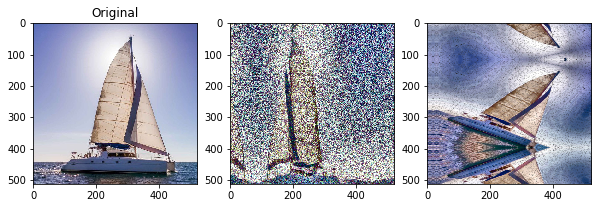

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,10))
ax1.imshow(img)
ax1.set_title("Original")
ax2.imshow(aug_img_1)
ax3.imshow(aug_img_2)
plt.show()

**Hint:** the default order in which the functions are applied can be ascertained by calling the augmenter's `f_list` attribute.

### Note On Reproducibility:

When using the `simple_augment` method, it is possible that we will want to yield reproducible results to some degree. Because some of the transformation functions are not *determinable*, augmenting the same image is still likely to produce different results. The only way, therefore, to yield reproducible results is to use the `simple_augment` method, specifying the order (as above), and using only the determinable transformations.

## Augmenting Training Data

Given a pre-initialized `imgo.uptools` `Image_Dataset` object that has been split into training, validation, and testing subsets (see the **uptools** demo for more information), we can use **augtools** to augment the images in the training set by using the **uptools** method `augment_training_set`. This method will generate and return a number of augmented images depending on a few parameters, either in place (ie, replacing the original images in the subset), or as a numpy-array.

This is done simply by calling the `augment_training_set` method, passing the `Augmenter` object we wish to use as an argument, specifying the proportion of the images to be augmented by using the `portion` argument (where the value given is a float between 0 and 1), whether to use `"simple"` or `"random"` augmentation by passing the relevant keyword to the `augment_type` argument (with the option to `order` the transformation functions, as above):

In [7]:
# split into training and testing subsets
image_dataset.data_split((0.7,0.3))

Splitting...
Data sucessfully split into training and testing subsets.


Let's take a look at some of the images in the training set:

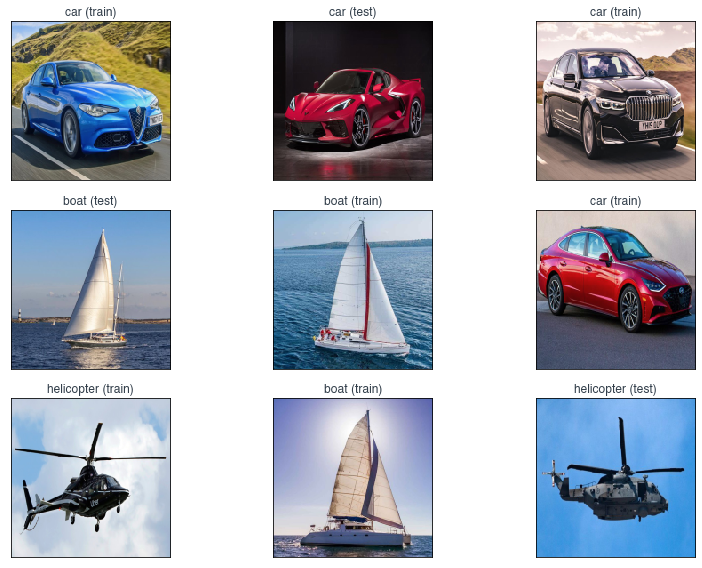

In [8]:
image_dataset.display_batch(3,3)

Now we call the `augment_training_set` method to augment, say, 80% of the training images:

In [9]:
# augment training images
image_dataset.augment_training_set(0.8,augmenter=augmenter)

100%|██████████| 10/10 [00:00<00:00, 11.30it/s]


Note that because the `augment_training_set` method belongs to the `imgo.uptools.Image_Dataset` class, there is no need to specify whether the data has be pre-normalized or pre-standardized, as this will be inferred by the `Image_Dataset` object's attributes.

We can then display a batch of images again to check that they have been augmented inplace:

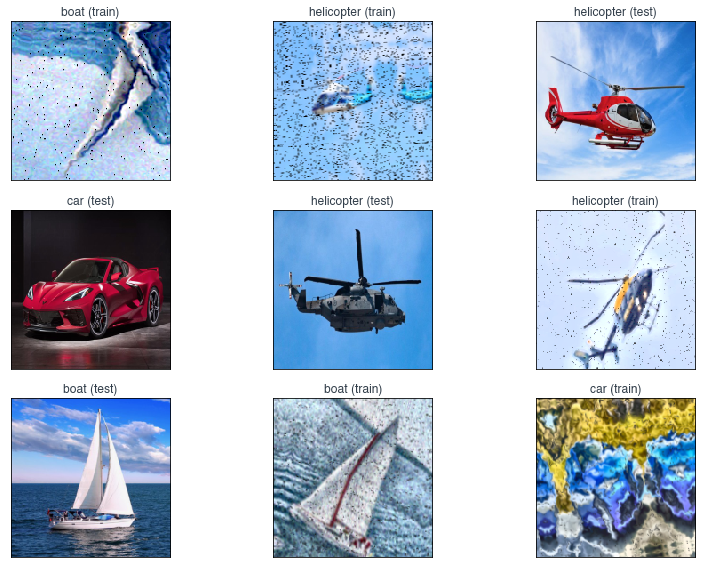

In [10]:
image_dataset.display_batch(3,3)

And there we have it! The `X_train` attribute of `my_image_dataset` is now contains augmented images. As we can see, however, the quality of augmented images in the training is not very good. This is because the images in the dataset have been rescaled to small dimensions prior to augmentation, and in general the larger the image, the better the results. For this reason, the keyword argument `augment_scale` is included. By passing a number to this argument, the images will be rescaled prior to augmentation, and then scaled back afterwards. Let's try again with this in mind:

In [11]:
# setting up the image dataset
image_dataset_2 = uptools.Image_Dataset('demo_img_data/imgs_a',"imgs",180)
image_dataset_2.data_split((0.7,0.3))

Processing X_data: 100%|██████████| 15/15 [00:00<00:00, 2646.81it/s]

Compiling datasets...
Image_Datset initialized successfully.
Splitting...
Data sucessfully split into training and testing subsets.


In [12]:
# augment training images with temporary rescaling
image_dataset_2.augment_training_set(0.8,augmenter=augmenter,augment_scale=500)

100%|██████████| 10/10 [00:03<00:00,  2.73it/s]


And now we can see the results:

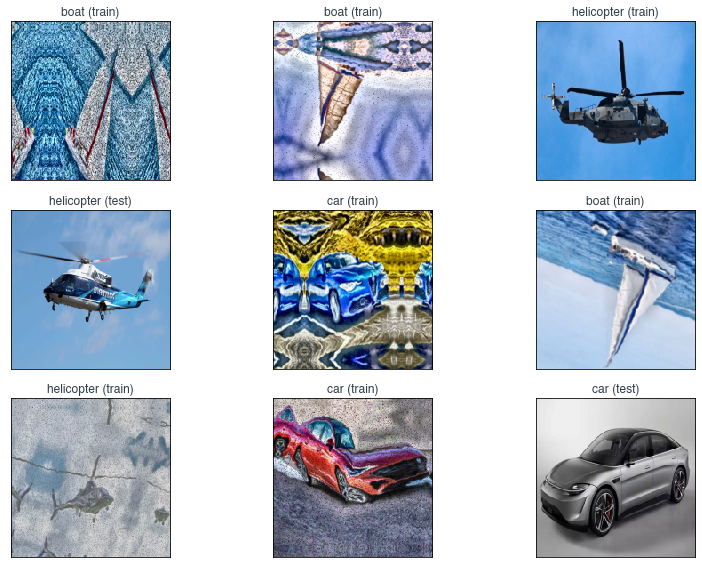

In [13]:
image_dataset_2.display_batch(3,3)

Much better! Keep in mind, however, that the higher the value given to the `augment_rescale` argument, the longer the process will take. 

## Rebalancing Class Sizes

The final feature included in this demo is the ability to rebalance class sizes in the dataset. Let's demonstrate this using the final collection of images in the repo:

In [14]:
image_dataset_3 = uptools.Image_Dataset('demo_img_data/imgs_d',"imgs",180)

Processing X_data: 100%|██████████| 91/91 [00:00<00:00, 2695.64it/s]

Compiling datasets...
Image_Datset initialized successfully.


And let's see what the dataset looks like:

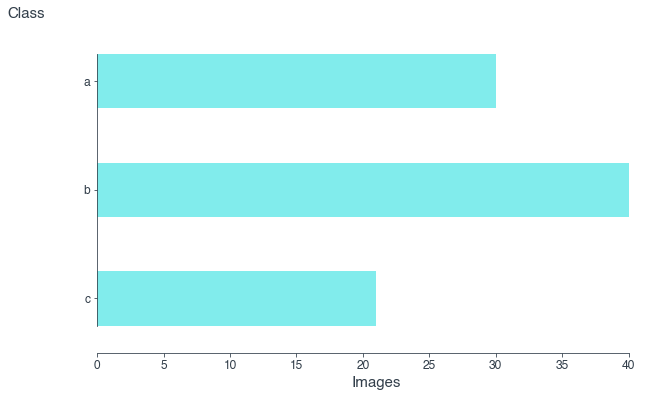

In [15]:
image_dataset_3.details(plot=True)

It looks like the dataset has a severe class imbalance... But we can fix this! To do so, we'll make use of the `Image_Dataset` object's `split_rebalance` method, which splits the data into training and testing (and validation) subsets, in the same way as the `data_split` method, and then calls on an `Augmenter` object to generate additional training images, leaving the testing/validation subsets untouched (and thereby avoiding any data-leakage):

In [16]:
image_dataset_3.split_rebalance((0.8,0.1,0.1),augmenter=augmenter,augment_scale=500)

Rebalancing: 100%|██████████| 59/59 [00:28<00:00,  2.10it/s]

Data sucessfully rebalanced and split into training, validation, and testing subsets.


Now let's inspect the result...

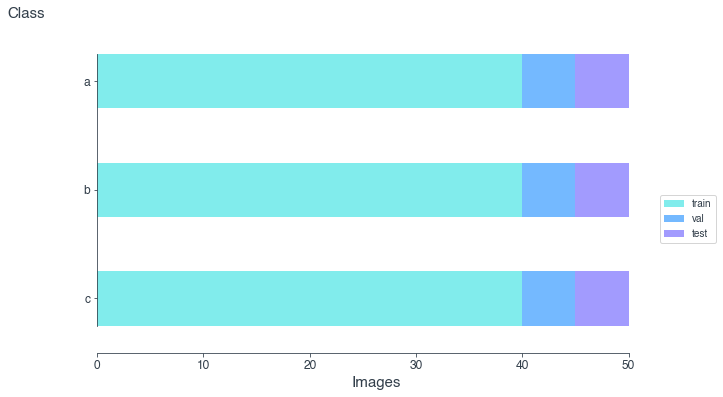

In [17]:
image_dataset_3.details(plot=True)

Success! The dataset is now not only balanced, but also split into testing and validation subsets. What's more, the testing and validation subsets are stratified to the rebalanced training set, so they contain an equal number of images in each class.

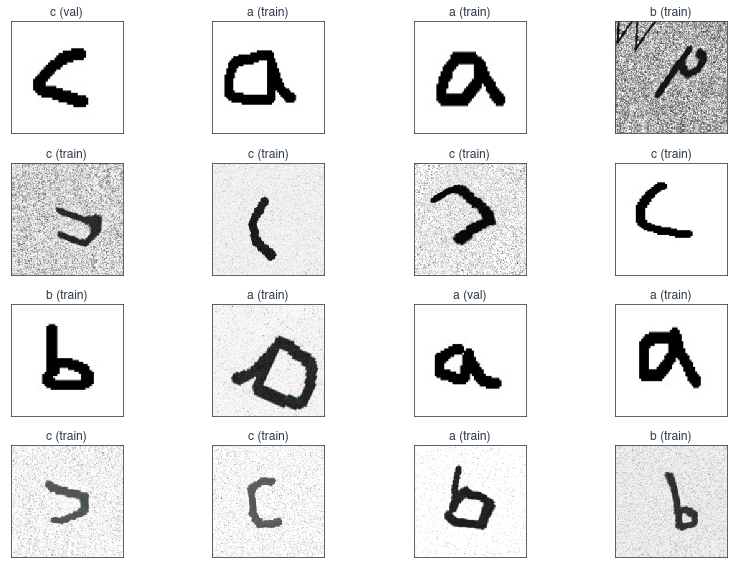

In [18]:
image_dataset_3.display_batch(4,4)

Of course, this method comes with some caveats...

The first is the fact that there is a limit to how many images can be generated. Because the dataset is split before rebalancing, in order to preserve an equal number of each class, the size of the combined testing and validation subsets (or just the testing subset if only split into two) is limited to half the size of the smallest class. The maximum size of the training set is therefore determined by the size of the smallest class, as well as the split ratios given. In the above example, the splits are given as follows: 80% training data, 10% validation data, and 10% testing data. The smallest class, ***b*** contained 21 images, and therefore the maximum size of the combined testing and validation subsets is 10 images. The maximum training set size (per class) is therefore limited to 10 / 0.2 \* 0.8 = 40 images. Using a different split will result in different sizes, and in general the higher the proportional size of the *training* data, the greater the number of generated images.

The second limitation is time. The method is rather computationally intensive, and using it on a large dataset can take a very long time. For a dataset consisting of 10,000 images, for example, depending on the transformation functions used, as well as the image dimensions (and of course the `augment_scale` dimensions), it can take around 3 hours to execute on a basic system. But that's life!

## Volià!

For more information on **imgo**, please see the README located in the GitHub repo. Happy machine learning!